<a href="https://colab.research.google.com/github/Moriyke-20/Moriyke-20/blob/main/MyMsc_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import random
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
!pip install --upgrade tensorflow
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Attention
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
!pip install -q streamlit

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Graphical interface of enhanced SVM algorithm for detection of SQLIA
!wget -q -O - ipv4.icanhazip.com


35.234.2.165


In [ ]:
%%writefile Enhanced_SVM.py
import streamlit as st
import altair as alt
import plotly.express as px

st.set_page_config(
    layout="wide",
    initial_sidebar_state="expanded")

alt.themes.enable("dark")

st.title("Enhanced SVM for SQLIA Detection")
st.sidebar.title("Navigation")

Overwriting Enhanced_SVM.py


In [ ]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
!streamlit run /content/Enhanced_SVM.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

your url is: https://five-bikes-dance.loca.lt
^C


In [ ]:
# Load the dataset
file_path = '/content/Modified_SQL_Dataset.csv'
SQLIA_data = pd.read_csv(file_path)
print(SQLIA_data)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Returns a description summary for each column in the DataFrame
SQLIA_data.describe()

                                                   Query  Label
0                      " or pg_sleep  (  __TIME__  )  --      1
1      create user name identified by pass123 tempora...      1
2       AND 1  =  utl_inaddr.get_host_address   (    ...      1
3       select * from users where id  =  '1' or @ @1 ...      1
4       select * from users where id  =  1 or 1#"  ( ...      1
...                                                  ...    ...
30914              DELETE FROM door WHERE grow = 'small'      0
30915                               DELETE FROM tomorrow      0
30916                       SELECT wide ( s )  FROM west      0
30917       SELECT * FROM  ( SELECT slide FROM breath )       0
30918                           SELECT TOP 3 * FROM race      0

[30919 rows x 2 columns]


,Label
count,30919.000000
mean,0.368123
std,0.482303
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Checks if there is NaN in the dataset
SQLIA_data.isnull()
SQLIA_data.isna().any()

# Drops all rows that contains NULL values
SQLIA_data = SQLIA_data.dropna()

# Detect missing data in the dataset
SQLIA_missing_data = SQLIA_data.isnull().sum()

# Display the number of missing values for each column
print("Missing data in each column:\n", SQLIA_missing_data)

# Drop any rows that contain missing data
data_cleaned = SQLIA_data.dropna()

# Drop any columns that contain missing data
SQLIA_data_cleaned = SQLIA_data.dropna(axis=1)

# Display the cleaned data
print("Data after dropping rows and columns with missing values:\n", SQLIA_data_cleaned.head())

# Detect duplicate rows in the dataset
SQLIA_duplicates_data = SQLIA_data_cleaned.duplicated()

# Display the duplicate rows
print("Duplicate rows in the dataset:\n", SQLIA_data_cleaned[SQLIA_duplicates_data])

# Remove duplicate rows
SQLIA_data_no_duplicates = SQLIA_data_cleaned.drop_duplicates()

# Display the data after removing duplicates
print("Data after removing duplicates:\n", SQLIA_data_no_duplicates.head())

# Save the cleaned dataset to a new CSV file
SQLIA_data_no_duplicates.to_csv('cleaned_dataset_no_duplicates.csv', index=False)


Missing data in each column:
 Query    0
Label    0
dtype: int64
Data after dropping rows and columns with missing values:
                                                Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
Duplicate rows in the dataset:
           Query  Label
866      #NAME?      1
11747  3.82E+15      0
11982  8.36E+15      0
12054  6.66E+15      0
12208  3.19E+15      0
12730  5.26E+15      0
12741  4.47E+15      0
12876  4.80E+15      0
12942  4.23E+15      0
12963  8.62E+15      0
13243  2.78E+15      0
13306  3.82E+15      0
13313  4.28E+15      0
13328  4.28E+15      0
13532    #NAME?      0
13701  7.67E+15      0
13864  2.75E+15      0
13871  5.56E+15      0
13941  2.46E+15      0
14131  3.62E+15      0
1

<ipython-input-4-a613ed11c77d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=SQLIA_data_no_duplicates, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Distribution of Labels (0 or 1)')

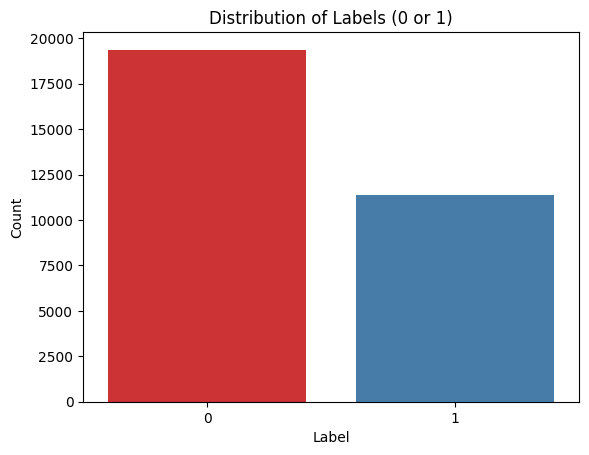

In [ ]:
# Uses seaborne to create a count plot of the occurrences of each label in the 'Label' column
counts = SQLIA_data_no_duplicates['Label'].value_counts()

sns.countplot(x='Label', data=SQLIA_data_no_duplicates, palette='Set1')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (0 or 1)')


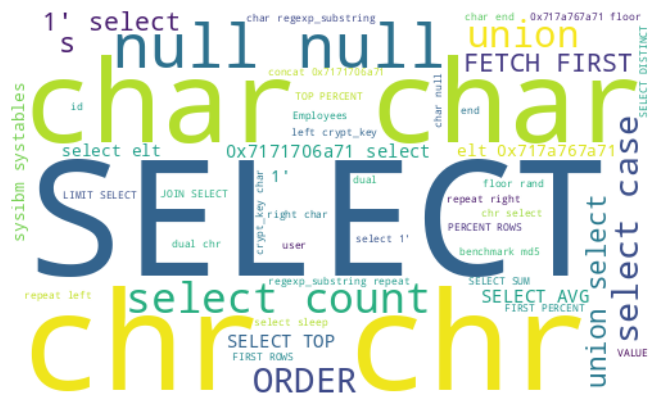

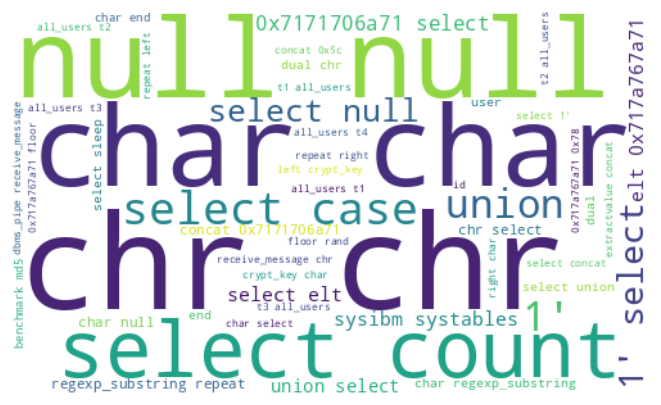

Text(0, 0.5, 'Frequency')

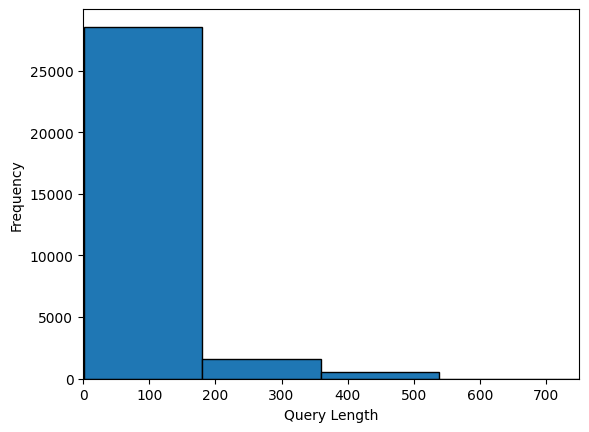

In [ ]:
# Uses WorldCloud to display a word cloud to visualize the most frequent words in the sentences.
from wordcloud import WordCloud

# Generates word cloud
wordcloud = WordCloud(width=500, height=300, max_words=50, background_color='white').generate(' '.join(SQLIA_data_no_duplicates['Query']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


# Displays a word cloud to visualize the most frequent words in label '1' entriess
# Filters the DataFrame for entries with Label '1'
filtered_SQLIA_data_no_duplicates = SQLIA_data_no_duplicates[SQLIA_data_no_duplicates['Label'] == 1]

wordcloud = WordCloud(width=500, height=300, max_words=50, background_color='white').generate(' '.join(filtered_SQLIA_data_no_duplicates['Query']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Uses historgram to visualize the distribution of sentence lengths
SQLIA_data_no_duplicates['Query'].apply(len).plot(kind='hist', bins=30, edgecolor='black')

plt.xlim(0, 750)
plt.xlabel('Query Length')
plt.ylabel('Frequency')

In [ ]:
# Randomly shuffles the rows of the DataFrame using the 'sample' method
SQLIA_data_no_duplicates = SQLIA_data_no_duplicates.sample(frac = 1, random_state = 42)

# Extracts the 'Query' column as the feature (X) and the 'Label' column as the label (y) from the DataFrame.
X = SQLIA_data_no_duplicates['Query']
y = SQLIA_data_no_duplicates['Label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the accuracy of each fold
accuracies = []

# Loop over each fold
fold = 5
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Print dimension of the training and testing sets to console
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24603,)
(24603,)
(6150,)
(6150,)


In [ ]:
# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=10000)  # num_words is the maximum number of words to keep

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(X_train)

# Print the sequences
print("Sequences:", sequences)

# To see the word index (mapping of words to integers)
word_index = tokenizer.word_index
print("Word Index:", word_index)

# Pad sequences to ensure they have the same length
padded_sequences = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')  # Adjust maxlen as needed

# Print the padded sequences
print("Padded Sequences:", padded_sequences)
print("X_train shape:", padded_sequences.shape)

with tf.device('/CPU:0'):

  # Enable eager execution for better debugging
  tf.config.run_functions_eagerly(True)

# Define input layers for query and value
  query_input = tf.keras.Input(shape=(20,))
  value_input = tf.keras.Input(shape=(20,))

 # Embedding layer
  embedding_layer = Embedding(input_dim=10000, output_dim=64, input_length=20)
  query_embedding = embedding_layer(query_input)
  value_embedding = embedding_layer(value_input)

# LSTM layers
  lstm = LSTM(units=64, return_sequences=True)(query_embedding)

# Attention layer - Pass query and value embeddings as a list
  attention_output = Attention(name='attention')([lstm, value_embedding])
  attention_output = tf.keras.layers.Flatten()(attention_output) # Flatten the output of the Attention layer

print("attention_output shape:", attention_output.shape)
  # Dense layer
output = Dense(1, activation='sigmoid')(attention_output)

  # Create the model
model = tf.keras.Model(inputs=[query_input, value_input], outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit([padded_sequences, padded_sequences], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Prepare test data - use padded_sequences from the training data for consistency

tokenizer.fit_on_texts(X_test)

X_test_seq = tokenizer.texts_to_sequences(X_test) # Tokenize test data

# Print the test sequences
print("Test Sequences:", X_test_seq)

# To see the word index (mapping of words to integers)
word_index = tokenizer.word_index
print("Word Index:", word_index)

X_test_padded = pad_sequences(X_test_seq, maxlen=20, padding='post', truncating='post') # Pad test data

# Print the padded sequences
print("X_test_padded Sequences:", X_test_padded)
print("X_test shape:", padded_sequences.shape)

try:
    # Code that might raise an exception
    pass
except Exception as e:
    print("An error occurred:", e)
    import traceback
    traceback.print_exc()

# Test the LSTM model
X_pred = (model.predict([X_test_padded, X_test_padded]) > 0.5).astype(int).flatten()

print(f"Accuracy Score of LSTM model: {round(accuracy_score(X_pred, y_test), 2)}")
print(f"F1-score of LSTM model: {round(f1_score(X_pred, y_test), 2)}")
print(f"Recall Score of LSTM model: {round(recall_score(X_pred, y_test), 2)}")
print(f"Precision Score of LSTM model: {round(precision_score(X_pred, y_test), 2)}")

# Evaluate the model performance
test_loss, test_accuracy = model.evaluate([X_test_padded, X_test_padded], y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Sequences: [[15, 5, 394, 1, 16, 2, 13, 22, 39, 13, 22, 40, 13, 22, 41, 13, 22, 77, 13, 22, 139], [1, 5552, 6, 32, 1306, 6, 582, 2, 2891], [1, 360, 1091, 9261, 583, 4, 3152, 107, 34, 9], [1, 111, 2120, 6, 1824, 2, 1549], [1, 584, 763, 2, 533, 4, 295, 9262, 14, 1, 64, 585, 2, 1307], [1, 2, 915, 4, 446, 3546], [9263], [1, 16, 9264, 2, 651], [9265], [1, 2, 3153, 4, 1550, 5553, 71, 18], [9266], [9267], [15, 1, 25, 24, 2892, 2892, 23, 3, 21, 2892, 1, 2892, 2, 133, 145, 175, 182, 19], [142, 9268, 293, 2893, 130, 3547], [9269], [1, 78, 32, 85, 83, 85, 106, 2, 58, 195, 4, 78, 32, 47, 9270, 31, 20, 85, 32, 91], [1, 16, 2, 60, 61, 6, 39, 60, 61, 6, 40, 60, 61, 6, 41, 5, 5554, 5554], [1, 27, 150, 89, 148, 151, 66, 59, 5, 9271, 27, 9272], [1, 25, 24, 3548, 9273, 23, 3548, 21, 3548, 1, 3548, 2, 321, 322, 19], [281, 2894, 74], [3, 6, 9274, 4, 5555, 5555, 14, 13, 1, 9, 9, 9], [5556, 93, 5557], [1, 2, 1308], [1, 55, 1092, 2, 1309, 1, 80, 1093], [1, 2, 22, 4, 32, 3, 10, 3, 10, 3, 3, 3], [15, 1, 9275, 4,

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


attention_output shape: (None, 1280)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 20)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 20, 64)         │        640,000 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 20, 64)         │         33,024 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 20, 64)         │              0 │ lstm[0][0],            │
│                           │                        │                │ embedding[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1280)           │              0 │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │          1,281 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 674,305 (2.57 MB)

 Trainable params: 674,305 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


616/616 ━━━━━━━━━━━━━━━━━━━━ 163s 264ms/step - accuracy: 0.9247 - loss: 0.1894 - val_accuracy: 0.9931 - val_loss: 0.0325
Epoch 2/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 140s 227ms/step - accuracy: 0.9954 - loss: 0.0220 - val_accuracy: 0.9929 - val_loss: 0.0307
Epoch 3/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 143s 228ms/step - accuracy: 0.9958 - loss: 0.0206 - val_accuracy: 0.9933 - val_loss: 0.0336
Epoch 4/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 148s 240ms/step - accuracy: 0.9975 - loss: 0.0150 - val_accuracy: 0.9931 - val_loss: 0.0348
Epoch 5/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 195s 229ms/step - accuracy: 0.9970 - loss: 0.0151 - val_accuracy: 0.9929 - val_loss: 0.0326
Epoch 6/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 148s 239ms/step - accuracy: 0.9977 - loss: 0.0113 - val_accuracy: 0.9923 - val_loss: 0.0355
Epoch 7/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 194s 227ms/step - accuracy: 0.9975 - loss: 0.0129 - val_accuracy: 0.9915 - val_loss: 0.0458
Epoch 8/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.9970 - loss: 0.01

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.9049 - loss: 0.6769
Test Loss: 0.6693
Test Accuracy: 0.9055
Test Accuracy: 0.9055


  1/769 ━━━━━━━━━━━━━━━━━━━━ 1:10 92ms/step

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


769/769 ━━━━━━━━━━━━━━━━━━━━ 66s 86ms/step
Weighted Sequence:
tf.Tensor(
[[[[ 7.133046    4.7109284   7.887286    9.430291   11.016032
     6.155704    6.4135857  12.1018095  12.092909   11.077354
    12.981103   15.132791    2.0142689   3.525556   14.011964
     3.581548    7.0637197   3.7482445   3.7054863  10.769518
     5.036625    5.137142    2.3289123   6.4808474  15.552095
     2.3933225  13.910393    0.09524822  1.8992536   4.256777
    14.315747   10.596144   15.20468     1.8705231   3.1068754
    14.240892    9.249695    7.9058332   5.1809115   7.9714127
    11.271239    8.305207    6.46733     5.384465    8.1069145
    13.503418    3.5416875   0.06709528 16.718845    1.6977834
    12.155647   12.357557    0.22695625  6.825694    5.593462
    13.501431   11.726035    5.7844186   4.8314357  16.771732
     9.757992    4.5048356   7.9954944  10.803432  ]
   [ 5.8231277   3.823217    8.6810665  14.734094   15.369223
    16.707165   11.014499    1.4294428  15.600617    3.909893
  

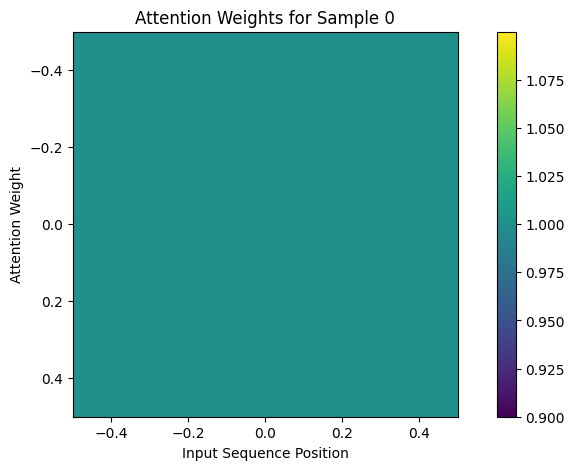

Top Features Indices: tf.Tensor(
[[59 48 24 32 11 30 35 14 26 45 55 10 51 50  7  8 56 40  9  4 63 19 31 60
   3 36 41 44 62 39 37  2  0 16 53 23 42  6  5 57 54 43 38 21 20 58  1 61
  29 17 18 15 46 13 34 25 22 12 28 33 49 52 27 47]
 [37 23  5 53 24 61  8 41 38  4 35 16  3 11 33 60 43 29 57 28 62 46 31 45
  25  6 22 58 13 32 36 48 39 52 30  2 26 19 18 42 54 12 20  0 50 55 15  9
  21  1 10 49 51 40 34  7 47 44 59 63 17 56 27 14]
 [16 51  7 18  6 12 29 27 37 30 41 47 48 36 38 25 34 23 45 15 24 44 22 61
   1 60  9 50 53 63  3 58 19 21 26 14 43 55 33 13 59 54 10 17 62 42 32  5
  56 49 11 40  4 52 28 20  2 57  8 46 31 35  0 39]
 [24 57 33  7 23 55 43 36 50 54 38 12 40 16 18 45 51 27 49 25 41 13 61 29
  59 44 35  6 19 37 52 14 28 11 34 31 60 21 32 63 39 47 48 15 26 58 10  2
   3  8 20  0  9 17 22 62  1 46 42 30 56 53  5  4]], shape=(4, 64), dtype=int32)
Trained Original tokens
['wp', 'fetch', 'when', 'id', '113', 'order', 'elt', 'union', '122', '112', 'avg', 'or', '106', 'orders', 'as', 'char

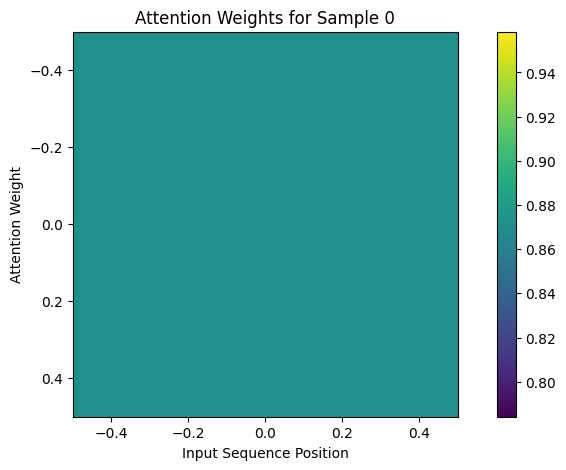

Top Features Indices: tf.Tensor(
[[58 39  7 50 33 35 34 29  5 59 17 44 47 42  6 23 55 15 63 48 27 60  0 32
   9 13 45 41 56 49  3 62 19 54 43 36 51 11 21 53 37 10 57 14 12 20 61 16
  25 38 46 31  4 28 26 40 22 18 24  2  1  8 30 52]
 [27 23  1  5  3 18 56 14 40 12 42 17 25 28 36 30 29 49 62  9 41 44 54 55
  53  2 31 47 39 16 11 10 48 57 60 32 37 46  8 22 50 52 21 15 20 19 13 26
  33 43 61 59 35 63  0 51  4 58  6  7 45 24 38 34]
 [29  4  2 44 24 57 28 31 58 53 56 41 14 19 25 50 51 61 59 46 21 13 55 34
   0 48 30 52 39 36 17 18 20 10 47 62  3 22 38 35 27 32  7 40 63  1 42 49
   5  9 54 12 37  8 16 23 26 45 60 33 15 11  6 43]
 [37 33 30 16 11 19 43 35 48 52  4 25 50 32 46 40 45 21  3  1 42 44 59 58
  20 41  6 34 62 36 38 54 13 57  8  7 60 17 56 24 61 14 18 23 29  2 12 47
  55 49 26 63 27 53 31  0 39 10  9 15 22 51  5 28]], shape=(4, 64), dtype=int32)
Tested Original tokens
['2', 't1', 'as', 'orders', 'sleep', 'elt', 'not', 's', 'and', 'wp', '0', 'between', 'rows', 't3', 'chr', 'then', 'avg

In [13]:
from tensorflow.keras.layers import Layer

# for training set
sample_index_train = 0

attention_output_sample_train = attention_output[sample_index_train]  # Choose a specific sample

with tf.device('/CPU:0'):
  # Evaluate the tensor to get numerical values
  sample_attention_weights_train = tf.keras.backend.eval(attention_output_sample_train)

# Access the sample sequence using .iloc[] to ensure you're using positional indexing
attention_output_train = model.predict([padded_sequences, padded_sequences])

sample_sequence_train = attention_output_train[sample_index_train]

# Check if sample_sequence is a NumPy array
if isinstance(sample_sequence_train, np.ndarray):
    # If it is a NumPy array, you will need to convert it back to a string
    sample_sequence_train = " ".join([str(token) for token in sample_sequence_train])

# Convert the sample sequence to a numerical representation
sample_sequence_numeric_train = tokenizer.texts_to_sequences([sample_sequence_train])[0]

# Check the length of the sequence
sequence_length_train = len(sample_sequence_numeric_train)  # Make sure this is an integer

# Custom layer for slicing the attention weights
class SliceLayer(Layer):
    def call(self, inputs):
        sample_attention_weights_train, sequence_length_train = inputs

        # Convert sequence_length to a tensor
        sequence_length_train = tf.constant(sequence_length_train, dtype=tf.int32)

        # Perform slicing using TensorFlow operations
        # Slice the tensor for the sample index and sequence length
        sliced_attention_weights_train = sample_attention_weights_train[:, :sequence_length_train, :]

        return sliced_attention_weights_train

# Assuming sample_attention_weights is already a Keras tensor
sample_attention_weights_train = tf.random.uniform((1, 10, 64))  # Example attention weights tensor (batch_size, seq_len, num_features)

# Convert sequence_length to a tensor
sequence_length_train = tf.constant(4, dtype=tf.int32)

# Create an instance of the custom layer
slice_layer_train = SliceLayer()

truncated_attention_weights_train = slice_layer_train([sample_attention_weights_train, sequence_length_train])

# Reshape truncated_attention_weights if necessary
if len(truncated_attention_weights_train.shape) == 2:
    truncated_attention_weights_train = truncated_attention_weights_train.reshape((truncated_attention_weights_train.shape[0], -1))

# Convert sample_sequence_numeric to a tensor flow array
sample_sequence_numeric_train = tf.constant(sample_sequence_numeric_train)

# Custom layer for element-wise multiplication
class MultiplyLayer(Layer):
    def call(self, inputs):
        sample_sequence_numeric_train, truncated_attention_weights_train = inputs

        # Cast sample_sequence_numeric to float32
        sample_sequence_numeric_train = tf.cast(sample_sequence_numeric_train, dtype=tf.float32)

        # Determine the sequence length
        sequence_length_train = tf.shape(sample_sequence_numeric_train)[0]

        # Reshape sample_sequence_numeric to be compatible with truncated_attention_weights
        sample_sequence_numeric_train = tf.reshape(sample_sequence_numeric_train, [1, sequence_length_train, 1])

        # Expand dimensions to match truncated_attention_weights if necessary
        sample_sequence_numeric_train = tf.expand_dims(sample_sequence_numeric_train, axis=-1)

        # Multiply using broadcasting
        return tf.multiply(sample_sequence_numeric_train, truncated_attention_weights_train)

# Wrap the multiplication in a Keras layer
trained_weighted_sequence = MultiplyLayer()([sample_sequence_numeric_train, truncated_attention_weights_train])

# Print the weighted sequence
print("Weighted Sequence:")
print(trained_weighted_sequence)

# Visualize attention weights - Ensure the dimensions match for plotting
plt.figure(figsize=(10, 5))

# Reshape truncated_attention_weights if necessary
if len(truncated_attention_weights_train.shape) == 1:
  truncated_attention_weights_train = truncated_attention_weights_train.reshape(1, -1)

attention_output_sample_train = model.predict([padded_sequences, padded_sequences])  # Replace attention_output_train with your train data

# If attention_output is a specific layer's output, access the output for a particular sample
sample_attention_weights_train = attention_output_sample_train[sample_index_train]  # Choose a specific sample

# Convert to a NumPy array if necessary
sample_attention_weights_train = np.array(sample_attention_weights_train)

if len(sample_attention_weights_train.shape) == 1:
    sample_attention_weights_train = sample_attention_weights_train.reshape(1, -1)
    # Reshape to 2D

# Plot the attention weights
plt.imshow(sample_attention_weights_train, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Input Sequence Position')
plt.ylabel('Attention Weight')
plt.title('Attention Weights for Sample {}'.format(sample_index_train))
plt.show()

# Ensure that truncated_attention_weights is evaluated
trained_truncated_attention_weights_np = truncated_attention_weights_train.numpy()

# Custom layer to compute top features based on attention weights
class TopFeaturesLayer(Layer):
    def call(self, truncated_attention_weights_train):
        # Sort the attention weights and get top 5 indices
        top_features_indices_train = tf.argsort(truncated_attention_weights_train[0], direction='DESCENDING')[:5]
        return top_features_indices_train

# Create an instance of the custom layer
top_features_layer_train = TopFeaturesLayer()

# Assuming `truncated_attention_weights` is a KerasTensor, apply the layer to get top features
top_features_indices_train = top_features_layer_train(truncated_attention_weights_train)

# If you want to use these indices for further operations in your model, you can chain them into the Keras Functional API or process them as needed
print("Top Features Indices:", top_features_indices_train)

# Create a reverse mapping from index to words
index_to_word = {index: word for word, index in tokenizer.word_index.items()}

# Convert numeric indices to original tokens
trained_original_tokens = [index_to_word.get(index) for index in top_features_indices_train.numpy().flatten()]

print("Trained Original tokens")
for token in trained_original_tokens:
    print(f"{trained_original_tokens}")

# for testing set
sample_index_test = 0

attention_output_sample_test = attention_output[sample_index_test]  # Choose a specific sample

with tf.device('/CPU:0'):
  # Evaluate the tensor to get numerical values
  sample_attention_weights_test = tf.keras.backend.eval(attention_output_sample_test)

# Access the sample sequence using .iloc[] to ensure you're using positional indexing
attention_output_test = model.predict([X_test_padded, X_test_padded])

sample_sequence_test = attention_output_test[sample_index_test]

# Check if sample_sequence is a NumPy array
if isinstance(sample_sequence_test, np.ndarray):
    # If it is a NumPy array, you will need to convert it back to a string
    sample_sequence_test = " ".join([str(token) for token in sample_sequence_test])

# Convert the sample sequence to a numerical representation
sample_sequence_numeric_test = tokenizer.texts_to_sequences([sample_sequence_test])[0]

# Check the length of the sequence
sequence_length_test = len(sample_sequence_numeric_test)  # Make sure this is an integer

# Custom layer for slicing the attention weights
class SliceLayer(Layer):
    def call(self, inputs):
        sample_attention_weights_test, sequence_length_test = inputs

        # Convert sequence_length to a tensor
        sequence_length_test = tf.constant(sequence_length_test, dtype=tf.int32)

        # Perform slicing using TensorFlow operations
        # Slice the tensor for the sample index and sequence length
        sliced_attention_weights_test = sample_attention_weights_test[:, :sequence_length_test, :]

        return sliced_attention_weights_test

# Assuming sample_attention_weights is already a Keras tensor
sample_attention_weights_test = tf.random.uniform((1, 10, 64))  # Example attention weights tensor (batch_size, seq_len, num_features)

# Convert sequence_length to a tensor
sequence_length_test = tf.constant(4, dtype=tf.int32)

# Create an instance of the custom layer
slice_layer_test = SliceLayer()

truncated_attention_weights_test = slice_layer_test([sample_attention_weights_test, sequence_length_test])

# Reshape truncated_attention_weights if necessary
if len(truncated_attention_weights_test.shape) == 2:
    truncated_attention_weights_test = truncated_attention_weights_test.reshape((truncated_attention_weights_test.shape[0], -1))

# Convert sample_sequence_numeric to a tensor flow array
sample_sequence_numeric_test = tf.constant(sample_sequence_numeric_test)

# Custom layer for element-wise multiplication
class MultiplyLayer(Layer):
    def call(self, inputs):
        sample_sequence_numeric_test, truncated_attention_weights_test = inputs

        # Cast sample_sequence_numeric to float32
        sample_sequence_numeric_test = tf.cast(sample_sequence_numeric_test, dtype=tf.float32)

        # Determine the sequence length
        sequence_length_test = tf.shape(sample_sequence_numeric_test)[0]

        # Reshape sample_sequence_numeric to be compatible with truncated_attention_weights
        sample_sequence_numeric_test = tf.reshape(sample_sequence_numeric_test, [1, sequence_length_test, 1])

        # Expand dimensions to match truncated_attention_weights if necessary
        sample_sequence_numeric_test = tf.expand_dims(sample_sequence_numeric_test, axis=-1)

        # Multiply using broadcasting
        return tf.multiply(sample_sequence_numeric_test, truncated_attention_weights_test)

# Wrap the multiplication in a Keras layer
tested_weighted_sequence = MultiplyLayer()([sample_sequence_numeric_test, truncated_attention_weights_test])

# Print the weighted sequence
print("Weighted Sequence:")
print(tested_weighted_sequence)

# Visualize attention weights - Ensure the dimensions match for plotting
plt.figure(figsize=(10, 5))

# Reshape truncated_attention_weights if necessary
if len(truncated_attention_weights_test.shape) == 1:
  truncated_attention_weights_test = truncated_attention_weights_test.reshape(1, -1)

attention_output_sample_test = model.predict([X_test_padded, X_test_padded])  # Replace attention_output_train with your train data

# If attention_output is a specific layer's output, access the output for a particular sample
sample_attention_weights_test = attention_output_sample_test[sample_index_test]  # Choose a specific sample

# Convert to a NumPy array if necessary
sample_attention_weights_test = np.array(sample_attention_weights_test)

if len(sample_attention_weights_test.shape) == 1:
    sample_attention_weights_test = sample_attention_weights_test.reshape(1, -1)
    # Reshape to 2D

# Plot the attention weights
plt.imshow(sample_attention_weights_test, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Input Sequence Position')
plt.ylabel('Attention Weight')
plt.title('Attention Weights for Sample {}'.format(sample_index_test))
plt.show()

# Ensure that truncated_attention_weights is evaluated
tested_truncated_attention_weights_np = tf.keras.backend.eval(truncated_attention_weights_test)

# Custom layer to compute top features based on attention weights
class TopFeaturesLayer(Layer):
    def call(self, truncated_attention_weights_test):
        # Sort the attention weights and get top 5 indices
        top_features_indices_test = tf.argsort(truncated_attention_weights_test[0], direction='DESCENDING')[:5]
        return top_features_indices_test

# Create an instance of the custom layer
top_features_layer_test = TopFeaturesLayer()

# Assuming truncated_attention_weights is a KerasTensor, apply the layer to get top features
top_features_indices_test = top_features_layer_test(truncated_attention_weights_test)

# If you want to use these indices for further operations in your model, you can chain them into the Keras Functional API or process them as needed
print("Top Features Indices:", top_features_indices_test)

# Create a reverse mapping from index to words
index_to_word = {index: word for word, index in tokenizer.word_index.items()}

# Convert numeric indices to original tokens
tested_original_tokens = [index_to_word.get(index) for index in tf.keras.backend.eval(top_features_indices_test).flatten()]

print("Tested Original tokens")
for token in tested_original_tokens:
    print(f"{tested_original_tokens}")

x_train_prepared = [[tokenizer.word_index.get(word, 0) for word in sample if word is not None] for sample in trained_original_tokens if sample is not None]

# For X_test_extracted:
x_test_prepared = [[tokenizer.word_index.get(word, 0) for word in sample if word is not None] for sample in tested_original_tokens if sample is not None]

# Pad the sequences to ensure they all have the same length
max_length = max(len(xi) for xi in x_train_prepared)
x_train = np.array([np.pad(xi, (0, max_length - len(xi)), 'constant') for xi in x_train_prepared])
print("X_train:", x_train)

max_length = max(len(xi) for xi in x_test_prepared)
x_test = np.array([np.pad(xi, (0, max_length - len(xi)), 'constant') for xi in x_test_prepared])
print("X_test:", x_test)


In [14]:
print("X_train shape:", sample_attention_weights_test.shape)
print("X_train shape:", attention_output_sample_test.shape)
print("X_train shape:", np.array(sample_sequence_test).shape)
print("X_train shape:", sample_index_test)
print("X_train shape:", sample_sequence_numeric_test.shape)
print("X_train shape:", sequence_length_test.shape)
print("X_train shape:", sample_sequence_test)
print("X_train shape:", attention_output_test.shape)
print("X_train shape:", tested_weighted_sequence.shape)
print("X_train shape:", truncated_attention_weights_test.shape)
print("X_train shape:", tested_truncated_attention_weights_np.shape)
print("X_train shape:", top_features_indices_test.shape)
print("y_train shape:", top_features_indices_train.shape)
print("X_test shape:", len(trained_original_tokens))
print("y_test shape:", len(tested_original_tokens))
print("X_train shape:", padded_sequences.shape)
print("y_train shape:", X_test_padded.shape)
print("X_test shape:", len(x_train_prepared))
print("y_test shape:", len(x_test_prepared))
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1, 1)
X_train shape: (6150, 1)
X_train shape: ()
X_train shape: 0
X_train shape: (1,)
X_train shape: ()
X_train shape: 0.87127954
X_train shape: (6150, 1)
X_train shape: (1, 1, 4, 64)
X_train shape: (1, 4, 64)
X_train shape: (1, 4, 64)
X_train shape: (4, 64)
y_train shape: (4, 64)
X_test shape: 256
y_test shape: 256
X_train shape: (24603, 20)
y_train shape: (6150, 20)
X_test shape: 252
y_test shape: 252
X_train shape: (252, 12)
y_train shape: (24603,)
X_test shape: (252, 12)
y_test shape: (6150,)


In [ ]:
import time
import math
import os

def objective_function(position):
      # position[0] corresponds to 'C' and position[1] corresponds to 'gamma'
    C = position[0]
    gamma = position[1]

    # Create SVM with given hyperparameters
    model = SVC(C=C, gamma=gamma)

    # Use cross-validation to evaluate the model
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()


    # We want to maximize accuracy, so return negative accuracy as GWO minimizes the objective
    return -accuracy

def GWO(
    X_train,
    X_test,
    y_train,
    y_test,
    objective_function,
    lower_bound,
    upper_bound,
    dimensions,
    pack_size,
    max_iterations
    ):
    # initialize alpha, beta, and delta_pos
    alpha_position=np.zeros(dimensions)
    alpha=float("inf")

    beta_position=np.zeros(dimensions)
    beta=float("inf")

    delta_position=np.zeros(dimensions)
    delta=float("inf")

    #Ensure that lower_bound and upper_bound have the correct number of dimensions
    if not isinstance(lower_bound, list) or len(lower_bound) != dimensions:
        lower_bound = [lower_bound] * dimensions
    if not isinstance(upper_bound, list) or len(upper_bound) != dimensions:
        upper_bound = [upper_bound] * dimensions


    #Initialize the positions of search agents
    positions = np.zeros((pack_size, dimensions))
    for i in range(dimensions):
        positions[:, i] = np.random.uniform(0,1, pack_size) * (upper_bound[i] - lower_bound[i]) + lower_bound[i]

    convergence_curve=np.zeros(max_iterations)

     # Loop counter
    print("Optimizing GWO  \""+objective_function.__name__+"\"")

    # Main loop
    for l in range(max_iterations):
        for i in range(pack_size):

            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dimensions):
                positions[i,j]=np.clip(positions[i,j], lower_bound[j], upper_bound[j])

            # Calculate objective function for each search agent
            fitness=objective_function(positions[i,:])

            # Update Alpha, Beta, and Delta
            if fitness<alpha :
                alpha=fitness; # Update alpha
                alpha_position=positions[i,:].copy()


            if alpha<fitness<beta:
                beta=fitness  # Update beta
                beta_position=positions[i,:].copy()


            if (beta<fitness<delta):
                delta=fitness # Update delta
                delta_position=positions[i,:].copy()

        a=2-l*((2)/max_iterations); # a decreases linearly fron 2 to 0

        # Update the Position of search agents
        for i in range(pack_size):
            for j in range (dimensions):

                r1=np.random.random()
                r2=np.random.random()

                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)

                alpha_update=abs(C1*alpha_position[j]-positions[i,j]); # Equation (3.5)-part 3
                X1=alpha_position[j]-A1*alpha_update; # Equation (3.5)-part 3

                r1=np.random.random()
                r2=np.random.random()

                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)

                beta_update=abs(C2*beta_position[j]-positions[i,j]); # Equation (3.5)-part 3
                X2=beta_position[j]-A2*beta_update; # Equation (3.5)-part 3

                r1=np.random.random()
                r2=np.random.random()

                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)

                delta_update=abs(C3*delta_position[j]-positions[i,j]); # Equation (3.5)-part 3
                X3=delta_position[j]-A3*delta_update; # Equation (3.5)-part 3


                positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)

        convergence_curve[l]=alpha;

        if (l%1==0):
          print(['At iteration '+ str(l)+ ' the best fitness is '+ str(alpha)]);

    print(positions.shape)
    print("Alpha position=",alpha_position);
    print("Beta position=",beta_position);
    print("Delta position=",delta_position);
    return alpha_position,beta_position,delta_position;

    for l in range(max_iterations):
    for i in range(pack_size):
        # Fitness evaluation and update logic (already in your code)

    # Print the current best alpha position and fitness at the end of the iteration
    print(f"At iteration {l}, best fitness: {alpha}, best position (C, gamma): {alpha_position}")


max_iterations=50
pack_size=5
dimensions=2
search_domain=[0,1]
lower_bound = [0.01, 0.0001]  #Lower bounds for C and gamma
upper_bound = [100, 1]  #Upper bounds for C and gamma

optimal_solution=GWO(X_train,X_test,y_train,y_test,objective_function,lower_bound,upper_bound,dimensions,pack_size,max_iterations)

print("Optimal hyperparameters found by GWO (C, gamma):", optimal_solution)

Optimizing GWO  "objective_function"


ValueError: X_train and y_train have different number of samples!

In [ ]:
#Applying enhanced SVM
svcclassifier = SVC(kernel = 'rbf', random_state = 50)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
P1=accuracy_score(y_pred,y_test)
print("Modified Accuracy score for SVM:", P1)
print("Earlier Accuracy score was", P)